### Problem Statement

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

- Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Objective of the study 

- To predict the breast cancer if malignant or benign (+ or -)

### Methodology 

- Step 1 : Importing Neccessary Libraries
- Step 2 : Data Presentation and Cleaning (if required)
- Step 3 : Data Visualisation & EDA
- Step 4 : Model Building - Train/Test Split, Rescalling
- Step 5 : Model Evaluation - Accuracy, AUC and ROC

# Step 1 : Importing Neccessary Libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [8]:
import warnings

# Show a warning
warnings.warn("This is a simple warning!", UserWarning)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2672\2619034614.py:4: UserWarning: This is a simple warning!
  warnings.warn("This is a simple warning!", UserWarning)


# Step 2 : Data Presentation and Cleaning (if required)

In [11]:
breast_cancer=pd.read_csv('data.csv')
breast_cancer.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [13]:
breast_cancer.shape

(569, 33)

- We can see that the first, second and the last column provides us no productive data. We can drop them off

In [16]:
#Drop the unnecessary columns.
col = ['id','Unnamed: 32']
breast_cancer = breast_cancer.drop(col,axis=1)
breast_cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [18]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- We can see that there are no missing data in the columns, so we can move on.

In [21]:
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Step 3 : Data Visualisation & EDA

In [24]:
#Understanding the data division using correlation plot

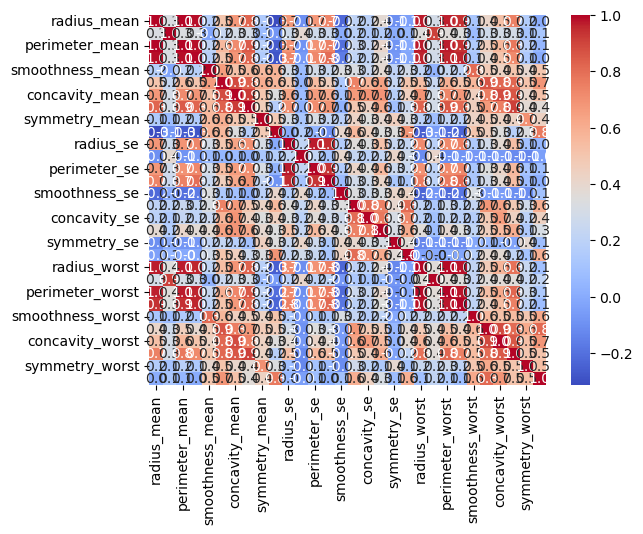

In [26]:
# Assuming 'breast_cancer' DataFrame, drop non-numeric columns (e.g., target labels)
numeric_df = breast_cancer.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, fmt='.1f', cmap='coolwarm')
plt.show()

INSIGHTS - 

- The correlation plot reveals strong positive correlations between related features, such as radius_mean and perimeter_mean, indicating that as one increases, the other tends to increase as well.

- Features with values near 0 suggest little to no linear relationship, while highly correlated groups (e.g., radius_mean, radius_se, radius_worst) may represent similar measurements.

- If two features show near-perfect correlations, one could be removed to avoid redundancy in the analysis.

C:\Users\DELL\AppData\Local\Temp\ipykernel_2672\2764597314.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.subplot().set_xticklabels(["Malignant", "Benign"])


[Text(0, 0, 'Malignant'), Text(1, 0, 'Benign')]

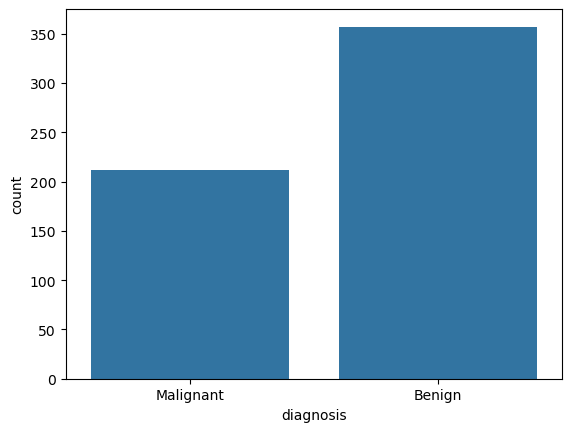

In [29]:
#Understanding the division between malignant and Benign

sns.countplot(x="diagnosis", data=breast_cancer)
plt.subplot().set_xticklabels(["Malignant", "Benign"])

INSIGHT 

- Imbalanced Distribution: The bar chart reveals that the dataset contains more Benign diagnoses than Malignant ones, indicating an imbalance between the two classes. This may require addressing through methods like data balancing to prevent model bias.

- Dominance of Benign Tumors: The larger number of Benign cases suggests that non-cancerous tumors are more prevalent, which could impact the approach to training models and understanding the overall dataset.

- Fewer Malignant Cases: With fewer Malignant diagnoses, the dataset might present challenges in detecting and correctly classifying these less frequent, but critical, cases, requiring careful attention during model development.

In [32]:
breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

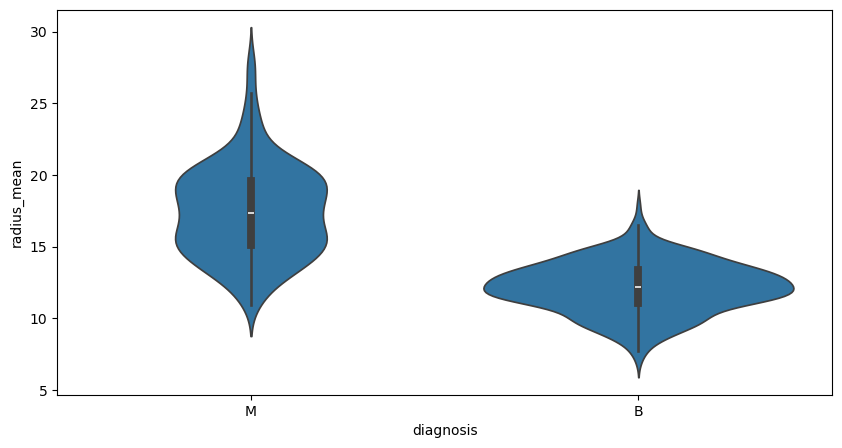

In [34]:
# Understanding the relationship between Diagnosis and Radius Mean

plt.figure(figsize=(10,5))
sns.violinplot(x='diagnosis', y='radius_mean', data=breast_cancer)
plt.show()

INSIGHT - 

- Higher Range for Malignant Tumors: The distribution of radius_mean for Malignant (M) cases shows a wider spread with values ranging from approximately 10 to 30, indicating greater variability in the size of malignant tumors.

- Lower and More Concentrated Radius for Benign Tumors: The radius_mean for Benign (B) cases is more concentrated between 10 and 15, suggesting that benign tumors tend to have smaller and more consistent sizes compared to malignant ones.

- Median Difference: The median radius_mean for malignant tumors is higher than for benign tumors, as seen in the plot, which could imply that larger tumor sizes are more likely to be malignant, potentially making tumor size a distinguishing feature.

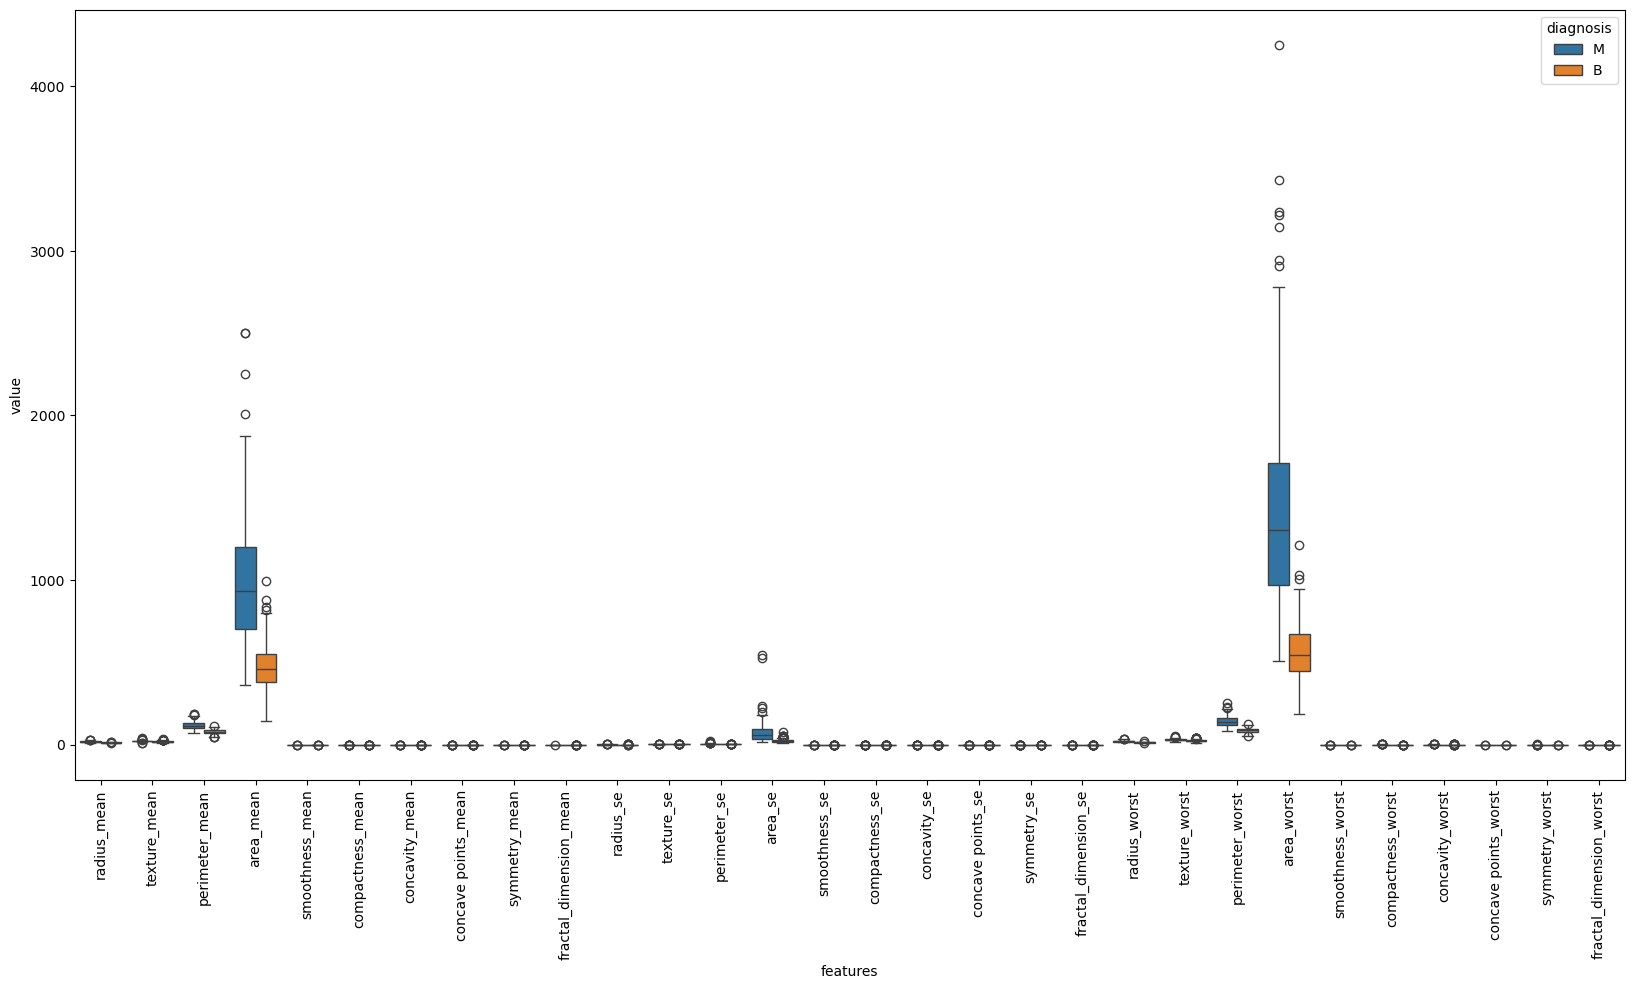

In [37]:
# Understanding the frequency of diagnosis


melt_df = pd.melt(breast_cancer, id_vars='diagnosis', var_name='features', value_name='value')

# creating a boxplot of all features
plt.figure(figsize=(20,10))
sns.boxplot(x='features', y='value', hue='diagnosis', data=melt_df)
plt.xticks(rotation=90)
plt.show()

INSIGHT - 

- Outliers and Variability

The box plot reveals the presence of several outliers in the data, particularly for features like "radius worst", "perimeter worst", and "area worst". These extreme values could potentially skew the distribution and impact the model's performance.
The variability in the data differs across features. Some features like "smoothness se" and "symmetry se" have a relatively narrow range, while others like "radius worst" and "perimeter worst" exhibit a wider range.


- Feature Importance

While the box plot doesn't directly show feature importance, it can provide some clues. Features with wider ranges and more prominent outliers might be more informative than features with narrower ranges and fewer outliers. However, this is a preliminary observation and further analysis is needed to confirm feature importance.


- Potential Data Preprocessing

The presence of outliers suggests that data preprocessing techniques like outlier handling (e.g., capping, flooring, or removal) might be beneficial to improve the model's performance and robustness.
Additionally, scaling or normalization of features might be necessary to ensure that features with larger scales don't dominate the model's learning process.

# Step 4 : Model Building - Train/Test Split, Rescalling

In [41]:
breast_cancer.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [43]:
#Conversion of Categorical Data into Numerical data 

diagnosis_y = LabelEncoder()
breast_cancer['diagnosis'] = diagnosis_y.fit_transform(breast_cancer['diagnosis'])

In [45]:
#Model Building and Division of the train/test 

X1 = breast_cancer.drop('diagnosis',axis=1)
y1 = breast_cancer['diagnosis']

In [47]:
X1.shape

(569, 30)

In [49]:
X1.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [51]:
y1.shape

(569,)

In [53]:
y1

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [55]:
#Train test split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=0)

In [57]:
X_train1.shape

(455, 30)

In [59]:
X_test1.shape

(114, 30)

In [61]:
y_train1.shape, y_test1.shape

((455,), (114,))

In [65]:
#Tuning the hyperparameters

knn_1 = KNeighborsClassifier(n_neighbors=5) #nearest neighbours = 5

In [67]:
scale1 = StandardScaler()
X_train1 = scale1.fit_transform(X_train1)
X_test1 = scale1.fit_transform(X_test1)

In [69]:
X_train1

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [71]:
X_test1

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [73]:
#Fitting the model 

knn_ = knn_1.fit(X_train1,y_train1)

# Step 5 : Model Evaluation - Accuracy, AUC and ROC

In [75]:
y_pred1 = knn_.predict(X_test1)

In [77]:
#Predicting the accuracy score

val = accuracy_score(y_pred1,y_test1)
print(f"Accuracy for KNN with K = 5, {val*100:.4f}")

Accuracy for KNN with K = 5, 96.4912


In [79]:
cm1 = confusion_matrix(y_test1,y_pred1)

<Figure size 700x500 with 0 Axes>

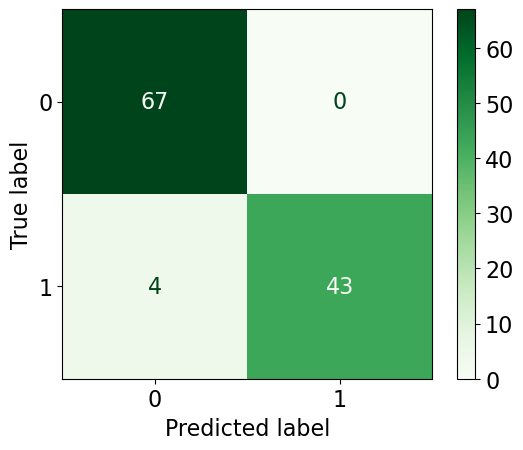

In [85]:
#HeatMap for Confusion Matrix
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 16})
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=knn_.classes_,)
disp.plot(cmap='Greens')

INSIGHTS - 

- Accuracy

The confusion matrix shows that the model has correctly classified 110 out of 114 instances. This results in an accuracy of approximately 96.49%. This indicates that the model is performing quite well in predicting the correct class.

- Class-wise Performance

The model is particularly strong in predicting class 0, with only 0 out of 67 instances misclassified. However, it struggles slightly more with class 1, misclassifying 4 out of 47 instances. This suggests that the model might need further improvement in handling class 1.


- Potential for Improvement

While the overall accuracy is high, there is still room for improvement. Analyzing the misclassified instances can provide insights into the model's weaknesses and potential areas for improvement. For example, exploring the characteristics of the misclassified instances can help identify patterns or biases that might be causing the errors.


In [89]:
### _Training and Testing Scores (Accuracy)_ 

In [91]:
knn_.score(X_train1,y_train1)

0.978021978021978

In [93]:
knn_.score(X_test1,y_test1)

0.9649122807017544

In [95]:
#AUC Score

y_pred_2 = knn_.predict(X_test1)

# AUC score for the binary classification problem
auc_score1 = roc_auc_score(y_test1, y_pred_2)

print("AUC Score:", auc_score1)

AUC Score: 0.9574468085106382


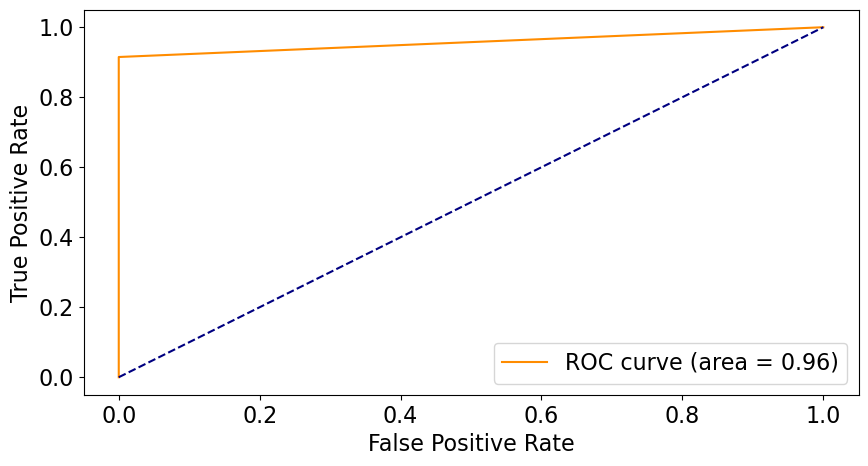

In [97]:
fpr_, tpr_, thresholds_ = roc_curve(y_test1, y_pred_2)
roc_auc1 = auc(fpr_, tpr_)

# Plot ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_, tpr_, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


INSIGHTS - 

- Model Performance

The ROC curve shows that the model has a high area under the curve (AUC) of 0.96. This indicates that the model is performing well in distinguishing between positive and negative classes. A higher AUC generally signifies better model performance.


- True Positive Rate vs. False Positive Rate

The shape of the ROC curve reveals the trade-off between the true positive rate (sensitivity) and the false positive rate (specificity) at different threshold settings. As the threshold decreases, the model becomes more sensitive (higher true positive rate) but also more prone to false positives.


- Comparison to Random Guessing

The dotted line in the plot represents the performance of a random classifier. The fact that the ROC curve of the model lies significantly above this line confirms that the model is performing better than random guessing.

In [100]:
k_range = range(3,100,2)
k_scores = []
for i in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    #5 Fold Cross Validation 
    scores = cross_val_score(knn_model, X1, y1,cv = 5, scoring = 'accuracy')
    scores = (scores*100).round(4)
    k_scores.append(scores.mean())

<Axes: >

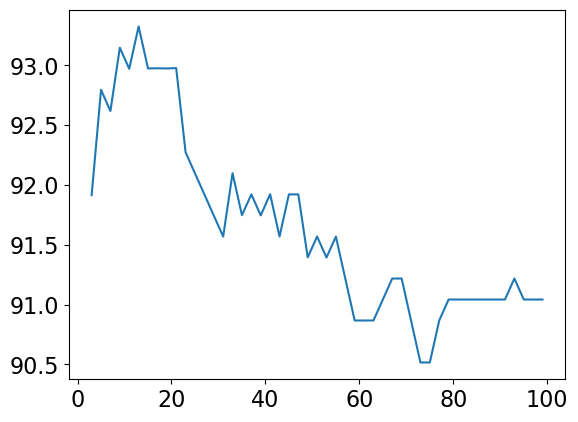

In [102]:
sns.lineplot(x=k_range,y=k_scores)
#For Cross Validation in KNN

INSIGHTS - 

- Fluctuating Trend

The line graph shows a fluctuating trend in the data, with multiple peaks and valleys. This suggests that the underlying process or system being measured is not stable and is subject to variations.


- Overall Downward Trend

Despite the fluctuations, there seems to be an overall downward trend in the data, especially towards the end of the x-axis. This suggests that the values are generally decreasing over time.


- Potential for Further Analysis

To gain deeper insights, it would be helpful to know the context of the data. What does the x-axis represent (time, iterations, etc.)? What are the units of the y-axis? Understanding the context can help identify the reasons for the fluctuations and the downward trend.